In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drinks_nutritional = pd.read_csv('starbucks_drinkMenu_expanded.csv')
#foods = pd.read_csv('starbucks-menu-nutrition-food.csv', encoding = "utf-16")
#drinks = pd.read_csv('starbucks-menu-nutrition-drinks.csv')

In [3]:
drinks_nutritional.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [4]:
drinks_nutritional.isna().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [5]:
drinks_nutritional[drinks_nutritional['Caffeine (mg)'].isna()]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1,0.5,0.0,5,25,18,0,18,2.0,2%,0%,6%,0.00%,NaN


In [8]:
# Starbucks menu online says it has 125 mg of caffeine
# Source: https://www.starbucks.com/menu/product/482/iced?parent=%2Fdrinks%2Fcold-coffees%2Ficed-coffees
drinks_nutritional = drinks_nutritional.fillna(125)
drinks_nutritional.isna().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                0
dtype: int64

In [9]:
drinks_nutritional.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object

Doesn't make sense that the fat is object! Are there any non-numerical values? 

In [23]:
drinks_nutritional[' Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

The "Beverage prep" column is interesting to me, we can see that there are various categories and beverage prep methods. I wonder how those correlate with calories, sugar, and other nutritional info. 

In [24]:
drinks_nutritional.groupby("Beverage_prep")['Calories'].mean().sort_values(ascending=False)

Beverage_prep
Whole Milk            283.750000
Venti Nonfat Milk     260.000000
2% Milk               218.000000
Grande Nonfat Milk    209.615385
Soymilk               207.272727
Tall Nonfat Milk      147.826087
Venti                 118.571429
Short Nonfat Milk      99.166667
Grande                 85.714286
Tall                   63.428571
Short                  37.000000
Doppio                 10.000000
Solo                    5.000000
Name: Calories, dtype: float64

<AxesSubplot:>

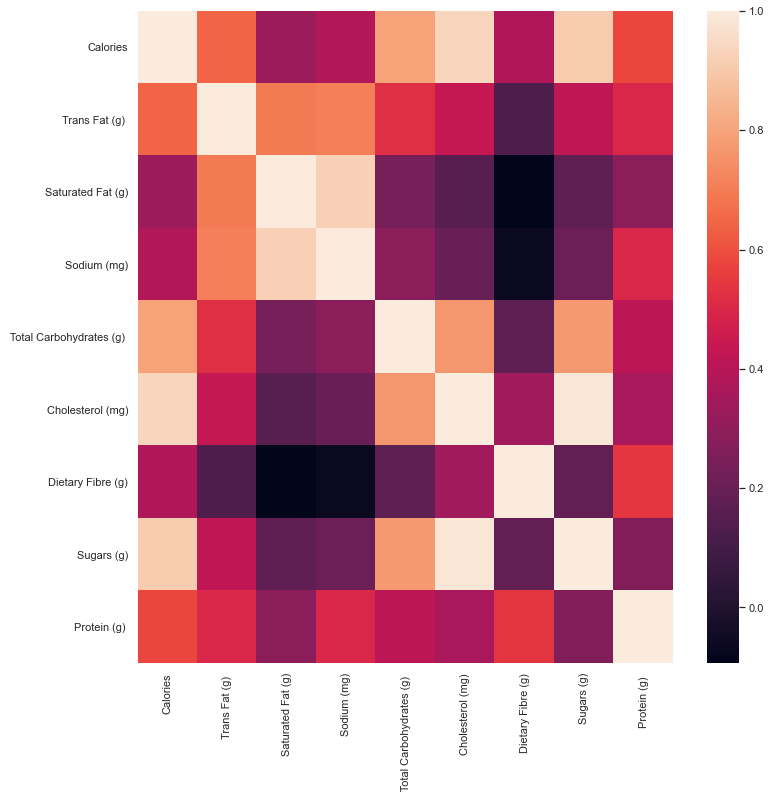

In [29]:
sns.set(rc = {'figure.figsize':(12,12)})
sns.heatmap(drinks_nutritional.corr())

The strongest correlations are calories, cholesterol, and sugar, with each other. Total carbohydrates also has fairly strong correlation with each of those as well. There is almost 0 correlation between saturated fat and sugar. Interesting! 

There is a realtively weak correlation between protein and sugar. Say want low sugar, high protein drinks. Let's examine what drinks are high in one and low in the other. 

In [32]:
drinks_nutritional.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [38]:
print("25 Percentile for sugars (g): ", drinks_nutritional[' Sugars (g)'].quantile(.25))
print("75 Percentile for protein (g): ", drinks_nutritional[' Protein (g) '].quantile(.75))

25 Percentile for sugars (g):  18.0
75 Percentile for protein (g):  10.0


In [42]:
drinks_nutritional[(drinks_nutritional[' Sugars (g)'] < drinks_nutritional[' Sugars (g)'].quantile(.25))\
                    & (drinks_nutritional[' Protein (g) '] > drinks_nutritional[' Protein (g) '].quantile(.75))]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
11,Classic Espresso Drinks,Caffè Latte,2% Milk,190,7,3.5,0.2,30,170,19,0,17,12.0,20%,2%,40%,0%,150
15,Classic Espresso Drinks,Caffè Latte,Soymilk,190,7,1.0,0.0,0,170,16,2,11,13.0,20%,0%,50%,25%,150
60,Classic Espresso Drinks,Skinny Latte (Any Flavour),Grande Nonfat Milk,120,0.3,0.2,0.0,5,160,18,0,16,12.0,20%,0%,35%,0%,150


Looks like the only drinks with high protein, low sugar are going to be a Latte	with 2%, Soymilk, or Nonfat milk. 

<AxesSubplot:xlabel=' Sugars (g)', ylabel='Calories'>

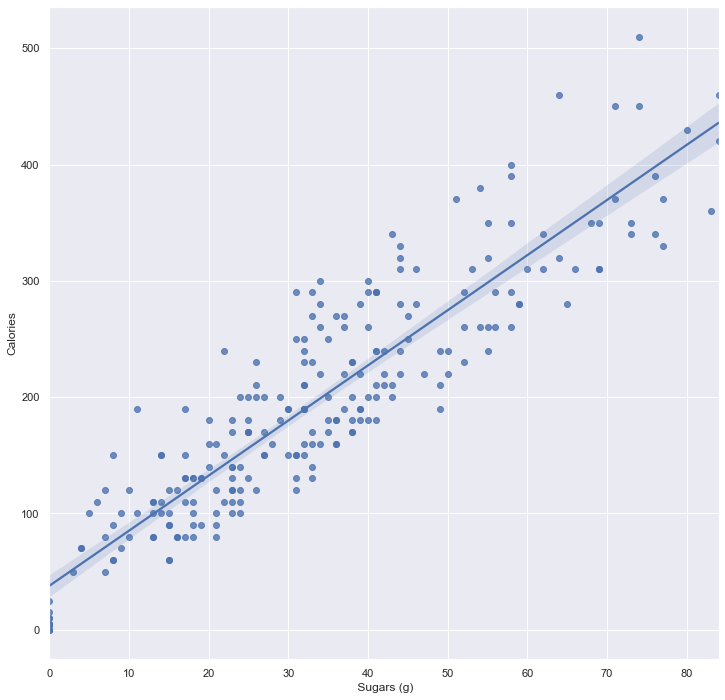

In [52]:
sns.regplot(x=' Sugars (g)', y='Calories', data=drinks_nutritional)

<AxesSubplot:xlabel='Cholesterol (mg)', ylabel='Calories'>

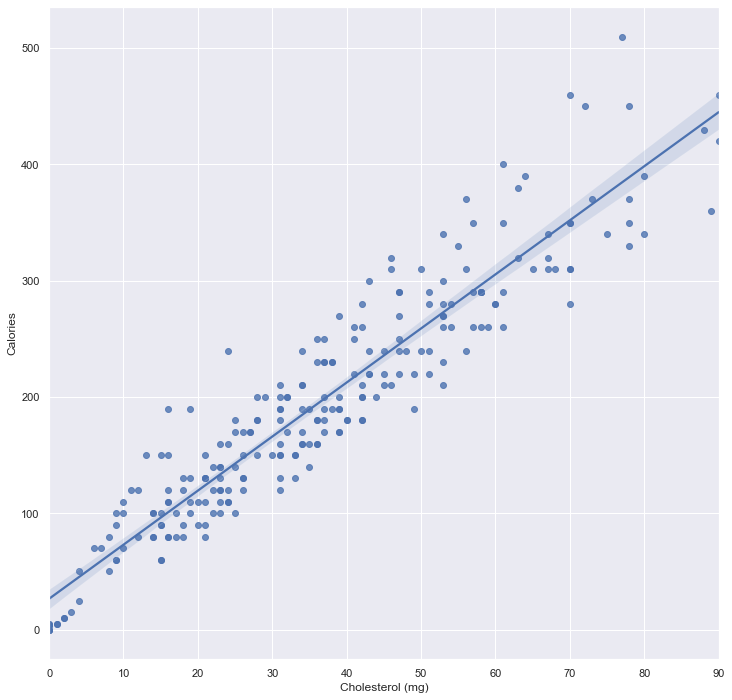

In [53]:
sns.regplot(x='Cholesterol (mg)', y='Calories', data=drinks_nutritional)

<AxesSubplot:xlabel='Cholesterol (mg)', ylabel=' Sugars (g)'>

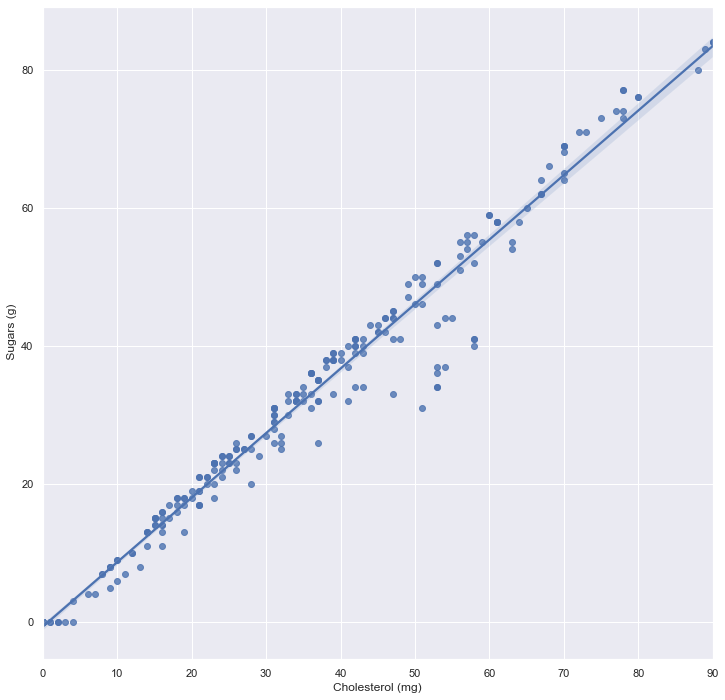

In [51]:
sns.regplot(x='Cholesterol (mg)', y=' Sugars (g)', data=drinks_nutritional)

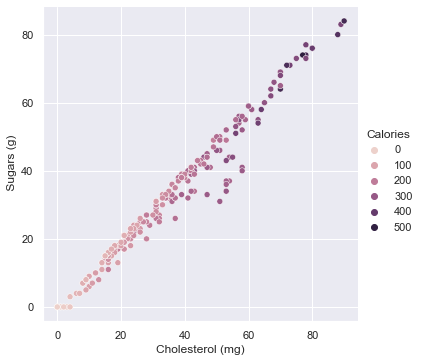

In [59]:
sns.set(rc = {'figure.figsize':(12,12)})
sns.relplot(x='Cholesterol (mg)', y=' Sugars (g)', hue="Calories", data=drinks_nutritional)

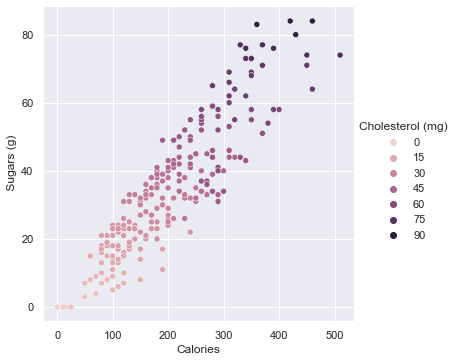

In [60]:
sns.relplot(x='Calories', y=' Sugars (g)', hue="Cholesterol (mg)", data=drinks_nutritional)